In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Cours accéléré analyse numérique - M2 AMS - 2023/2024

## Tout d'abord : Notebooks 

Ce fichier est un notebook. Il permet d'écrire du texte mathématique et d'écrire du code python. Il s'ouvre avec jupyter.

Pour lancer Jupyter, il faut, dans un terminal, lancer la commande

`jupyter-notebook`

Cela ouvrira automatiquement un navigateur Web dans lequel on peut travailler. L'onglet principal représente l’arborescence des fichiers depuis le fichier où la commande à été lancé.

Les notebooks sont composés de cellules contenant du code (en python) ou du texte (simple ou formaté avec les balisages Markdown). Ces notebooks permettent de faire des calculs interactifs en Python, et constituent un outil de choix pour l'enseignement.

On peut éditer une cellule en double-cliquant dessus, et l’évaluer en tapant **Ctrl+Entrée** (on utilisera aussi souvent **Maj.+Entrée** pour évaluer et passer à la cellule suivante). Les boutons dans la barre d’outil vous seront très utiles, survolez-les pour faire apparaître une infobulle si leur pictogramme n’est pas assez clair. N’oubliez pas de sauvegarder de temps en temps votre travail, même si Jupyter fait des sauvegardes automatiques régulières.



### Cellule Markdown
Le *Markdown* est un format de texte qui accepte un minimum de formattage. Il permet de rapidement :
- faire des liste.
- faire des *italiques*, du **gras**.
- faire des [liens](https://fr.wikipedia.org/wiki/Markdown)
- écrire des formules mathématiques avec  $\LaTeX$ .

### Cellule Python
La cellule suivante est une cellule python. On peut l'évaluer avec **Maj.+Entrée**.

In [26]:
# Ceci est un commentaire Python
# On prendra l'habitude de commenter son code :
# Un code doit être lisible et compréhensible par d'autres utilisateurs
#
a = 8
print("a =", a, "et 2*a =", 2*a)

a = 8 et 2*a = 16


$$\newcommand{\tn}{\mathrm}
\newcommand{\eref}[1]{(\ref{#1})}
\newcommand{\dep}[2]{\partial_{#2}{#1}}
\newcommand{\dis}{\displaystyle}
\newcommand{\R}{\mathbb{R}}
\newcommand{\C}{\mathbb{C}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\N}{\mathbb{N}}
$$
# Schémas de différences finies pour les équations différentielles.

## L'approximation numérique des équations différentielles.

On s'intéresse à l'approximation numérique des équations différentielles, ordinaires et aux dérivées partielles. C'est surtout les deuxièmes qui nous intéresseront mais pour introduire la méthode des différences finies, on commencera par les premières.

Les équations différentielles correspondent souvent à des modèles mathématiques décrivant des phénomènes physiques. Dans beaucoup de cas, on ne sait pas calculer une solution explicite d'une équation donnée, et on doit utiliser des techniques de résolution approchée. On s'intéresse alors à la **discrétisation** et à la **résolution numérique** de l'équation, autrement dit on remplace l'équation, qui est posée sur un domaine continu, par un problème discret, en discrétisant le domaine. Si l'équation originale est linéaire on obtient, en discrétisant, un système linéaire, si l'équation originale est non linéaire, on peut obtenir une équation non linéaire à résoudre, par exemple par une méthode de résolution approchée d'équations non linéaires comme la méthode de Newton.   
Les principales méthodes de discrétisation pour une équation différentielle sont les méthodes des différences finies, la méthode des éléments finis et la méthode des volumes finis. Il y a aussi d'autres classes de méthodes, comme les méthodes spectrales. Au début de ce cours on s'intéresse à la méthode des différences finies.

### La méthode des différences finies - approximation des dérivées.

On considère une équation différentielle, dont l'inconnue est une fonction $u$, posée sur un domaine physique $\Omega\subseteq\R^d,\ d\geq1$.

Le principe de la méthode des différences finies est d'approcher la solution $u$ de cette équation en un ensemble discret (mais **grand**) $\{x_1,\dots,x_N\}$ de points du domaine $\Omega,$ en remplaçant les dérivés de $u$ aux points $x_i$ par des quotients de différences faisant intervenir les points voisins de $x_i$. Cette approche sera valable si la solution du problème est régulière.

Par exemple, on a pour une fonction $u$ d'une seule variable que sa dérivé en un point $x$ de son domaine vérifie
$$
u'(x)=\lim_{h\to0}\frac{u(x+h)-u(x)}{h}=\lim_{h\to0}\frac{u(x)-u(x-h)}{h}=\lim_{h\to0}\frac{u(x+h)-u(x-h)}{2h}=\dots,
$$
et on peut donc approcher $u'(x)$ par les quotients
$$
\frac{u(x+h)-u(x)}{h},\ \frac{u(x)-u(x-h)}{h},\ \frac{u(x+h)-u(x-h)}{2h},\dots,
$$
avec $h\,$ **petit**.

Ces quotients de différences finies font intervenir des valeurs de $u$ en un nombre fini (dans chacun de ces exemples, deux) de points du domaine proche de $x.$ On va vérifier un peu plus en bas que l'on peut aussi approcher $u'(x)$ par exemple par la quantité
$$
\frac{2u(x+h)+3u(x)-6u(x-h)+u(x-2h)}{6h},
$$
pour $h$ petit.

On a aussi que si $u$ est deux fois dérivable au point $x,$ alors
$$
u''(x)=\lim_{h\to0}\frac{u(x+h)-2u(x)+u(x-h)}{h^2}
$$
et on peut donc aussi approcher $u''(x)$ par le quotient de différences finies
$$
\frac{u(x+h)-2u(x)+u(x-h)}{h^2},
$$
avec $h$ **petit**.

Une question que l'on se posera souvent dans le cadre de la méthode des différences finies est celle de l'**ordre** de l'approximation. On va expliciter cette notion plus loin, mais essayons de la comprendre dès maintenant. Elle mesure l'erreur commise dans ces approximations.



Supposons $a,\ b\in\R$ et $u:[a,b]\longrightarrow\R$ une fonction de classe $\mathcal C^4$.
Soit $x\in]a,b[$.

**Exercice 1**

1. Montrer, en utilisant des développements de Taylor de $u$ autour de $x$, que, lorsque $h\to0$,
  $$
\left|u'(x)-\frac{u(x+h)-u(x)}{h}\right|=\mathcal{O}(h),\ \ \ \left|u'(x)-\frac{u(x)-u(x-h)}{h}\right|=\mathcal{O}(h), 
  $$
  $$
  \left|u'(x)-\frac{u(x+h)-u(x-h)}{2h}\right|=\mathcal{O}(h^2).
  $$
  et que 
  $$
  \left|u'(x)-\frac{2u(x+h)+3u(x)-6u(x-h)+u(x-2h)}{6h}\right|=\mathcal{O}(h^3).
  $$

2. *Construction d'une approximation de différences finies à un ordre précis.* Chercher une approximation par différences finies de $u'(x)$ basée sur les points $x,\ x-h$ et $x-2h$ de la forme $au(x)+bu(x-h)+c u(x-2h)$ tel que
  $$
  \left|u'(x)-\big(au(x)+bu(x-h)+c u(x-2h)\big)\right|=\mathcal{O}(h^2).
  $$

Les différences ci-dessus s'appellent **erreurs de troncature** ou de **consistance** au point $x$. On dira que cette erreur est d'ordre 1 si elle se comporte en $\mathcal{O}(h)$, d'ordre $p>0$ si elle se comporte en $\mathcal{O}(h^p).$ Plus $p$ est grand, plus l'approximation choisie de la dérivée de $u$ est précise.

L'exercice 1.2 nous fait penser que l'on peut approcher la dérivée d'une fonction $u$ en un point $x$ par une formule de différences finies à un ordre souhaité, en utilisant des valeurs de $u$ en points autour de $x$, en cherchant les bons poids pour chaque valeur. Mais on voit facilement que le plus élevé est l'ordre souhaité, le plus de points il est nécéssaire d'utiliser.

**Exercice 2. Interpolation polynomial**

On peut approcher la dérivée d'une fonction $u$ en un point $x$ en approchant la fonction $u$ par un polynôme $X\mapsto P(X)$ et en calculant $P'(x)$. Vérifier que si l'on approche $u$ par ses polynômes d'interpolation de dégré 1 aux points $x$ et $x-h$, ou $x$ et $x+h$, ou $x-h$ et $x+h$, et que l'on calcule les dérivées de ces pôlynômes au point $x$, on obtient les formules de différences finies correspondantes que l'on a vu précédamment. On peut faire le même exercice en approchant $u$ par le polynôme d'interpolation (de degré 2) aux points $x,\ x-h$ et $x-2h$ et par le polynôme (de degré 3) qui interpole $u$ aux points $x,\ x+h,\ x-h$ et $x-2h$.


#### Approximation des dérivées dans un ensemble de points d'un intervale.

Soit $[a,b]\subseteq\R$ et $h>0$ tel qu'il existe $N\in\N$ tel que $\frac{b-a}{N}=h$. Considérons alors les $N+1$ points $x_n=a+nh,\ n=0,\dots,N$. L'ensemble discret formé par les points ${x_0,\dots,x_N}$ s'appelle une discrétisation régulière ou uniforme de $[a,b]$ de pas $h$.

Soit $u$ une fonction régulière définie sur $[a,b]$ et soit $U\in\R^{N+1}$ le vecteur $(U_0,\dots,U_N)$ avec $U_n=u(x_n),\ n=0,\dots,N$.

On souhaite ici approcher les dérivées de $u$ en chaque point $x_n$ de la discrétisation de l'intervalle $[a,b]$ au même ordre, en utilisant le même type de différences finies en chaque point. La difficulté en faire ceci consiste dans l'approximation des dérivées aux points $\{a,\ b\}$ du bord de l'intervalle et en général dans ces points on doit utiliser une approximation différente de celle utilisée aux points de l'intérieur du domaine. Ce problème se pose lors de la discrétisation des conditions aux limites pour un problème aux limites pour une équation aux dérivées partielles.

**Exercice 3**
1. Déterminer en fonction de $h$ et de $U$ un vecteur $V\in\R^{N+1}$ vérifiant
    $$
\max_{n=0,\dots,N}|V_n-u'(x_n)|=\mathcal{O}(h).
    $$
2. Déterminer en fonction de $h$ et de $U$ un vecteur $W\in\R^{N+1}$ vérifiant
    $$
\max_{n=0,\dots,N}|W_n-u'(x_n)|=\mathcal{O}(h^2).
    $$
3. **A faire dans la cellule code ci-dessous**.\\
  Illustrer numériquement les deux approximations de la dérivée de $u$ pour la fonction $u(x)=\sin(x)$ dans l'intervalle $[a,b]=[0,2\pi]$. Pour ce faire représenter dans la même figure la fonction $u'$, le vecteur $V$ et le vecteur $W$, en fonction de $x$, avec $h=\frac{2\pi}{10}$ et puis avec $h=\frac{2\pi}{100}$. Représenter dans une autre figure les différences $|u'-V|$ et $|u'-W|$. 

On peut construire une discrétisation non uniforme de l'intervale $[a,b]$, c'est-à-dire telle que la différence entre chaque deux points consécutifs de la discrétisation ne soit pas toujours égale. Dans ce cas on appelera pas de la discrétisation la plus grande distance entre chaque deux points consécutifs de la discrétisation.

Text(0.5, 1.0, 'h=2$\\pi$/100')

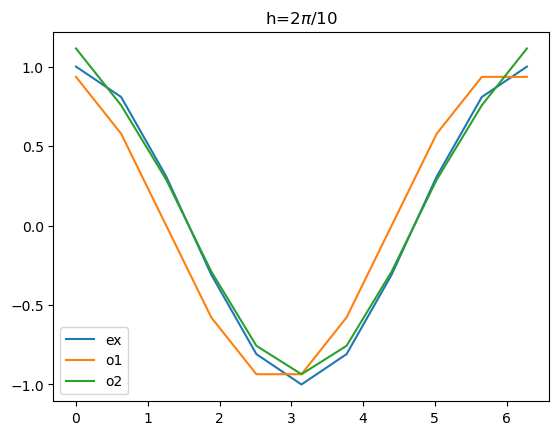

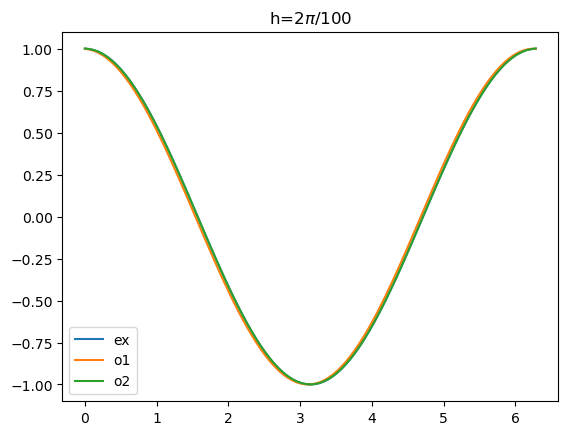

In [27]:
#CODER ICI
def u(x):
    return np.sin(x)

a=0
b=2*np.pi

N1=10
N2=100

h1=(b-a)/N1
h2=(b-a)/N2

# Discrétisation de [0,1] de pas h
x1=np.linspace(a,b,N1+1)
x2=np.linspace(a,b,N2+1)

# vecteur contenant U aux points de la discrétisation
U1=u(x1)
U2=u(x2)

# vecteur contenant U' avec l'approximation U'(x)=(U(x+h)-U(x))/h
V1=np.empty(U1.shape)
V1[:-1]=(U1[1:]-U1[:-1])/h1
V1[-1]=(U1[-1]-U1[-2])/h1

# vecteur contenant U' avec l'approximation U'(x)=(U(x+h)-U(x-h))/2h
W1=np.empty(U1.shape)
W1[1:-1]=(U1[2:]-U1[:-2])/(2*h1)
W1[-1]=(3*U1[-1]-4*U1[-2]+U1[-3])/(2*h1)
W1[0]=(-3*U1[0]+4*U1[1]-U1[2])/(2*h1)

plt.figure(1)
plt.plot(x1,np.cos(x1),label='ex')
plt.plot(x1,V1,label='o1')
plt.plot(x1,W1,label='o2')
plt.legend()
plt.title('h=2$\pi$/10')

V2=np.empty(U2.shape)
V2[:-1]=(U2[1:]-U2[:-1])/h2
V2[-1]=(U2[-1]-U2[-2])/h2

W2=np.empty(U2.shape)
W2[1:-1]=(U2[2:]-U2[:-2])/(2*h2)
W2[-1]=(3*U2[-1]-4*U2[-2]+U2[-3])/(2*h2)
W2[0]=(-3*U2[0]+4*U2[1]-U2[2])/(2*h2)

plt.figure(2)
plt.plot(x2,np.cos(x2),label='ex')
plt.plot(x2,V2,label='o1')
plt.plot(x2,W2,label='o2')
plt.legend()
plt.title('h=2$\pi$/100')


#### Analyse de l'ordre de précision.

La méthode des différences finies pour approcher la solution $u$ d'une équation différentielle posée dans un domaine $\Omega$ consiste à remplacer l'équation différentielle par une équation aux différences finies, en remplaçant les dérivées de $u$ par des quocients de différences finies en des points obtenues en discrétisant le domaine $\Omega$ avec un **pas** $h>0$.

Nous avons vu qu'en utilisant des développements de Taylor relativement simples, on peut obtenir l'ordre de l'erreur commmise entre la dérivée et son approximation par différences finies. Dans les exemples que l'on a vu, cette erreur se comporte en $\mathcal{O}(h^p)$, avec $p\in\N$. En géneral on ne sait pas exactement comment se comportent ses erreurs. Une manière d'avoir une idée de ce comportement est de représenter graphiquement la différence entre la fonction et ses dérivées, pour des valeurs de $h$ différentes, et de chercher à comprendre comment se comporte cette erreur en fonction de $h$.

  Plus précisément, considérons toujours le cas d'une fonction $u$ définie sur un intervalle $[a,b]$ et, pour $h>0$, une discrétisation de l'intervalle $[a,b]$ de pas $h$, donnée par $N+1$ points $x_0,\dots,x_N$ ($N$ dépend de $h$).

  Supposons de l'on approche la dérivée $u'(x_n)$ en chaque point $x_n$ de la discrétisation par un quocient de différences finies donnée par une formule $Du(x_n).$ On note $E(h)$ l'erreur globale commise (par exemple en norme infinie) avec le pas $h$ : $E(h)=\max_{n=0,\dots,N}|u'(x_n)-Du(x_n)|$. Supposons que l'on s'attend à ce que $E(h)$ se comporte comme $h^p$ pour un certain $p\in\N$, c'est-à-dire qu'il existe $C>0$ indépendant de $h$ tel que $E(h)\sim C h^p$. Alors on s'attend à ce que $\log\big(E(h)\big)$ se comporte comme
  $$
\log\big(E(h)\big)\sim \log(C)+p\log(h).
  $$
On peut alors représenter dans un graphique $\log(E(h)$ en fonction de $\log(h)$, pour des valeurs de $h$ de plus en plus petits. Si le comportement est l'attendu, on obtiendra que, dans cette échelle log-log, le graphique de $E(h)$ en fonction de $h$ est une droite de pente $p$, et cette pente de la droite nous donne l'ordre de la méthode.

**Exercice 4**
1. Choisir un point quelconque $x$ et représenter, pour plusieurs valeurs de $h$ de plus en plus petites, la différence en valeur absolue entre $u'(x)$ et, respectivement $\frac{u(x+h)-u(x)}{h}$, $\frac{u(x+h)-u(x-h)}{2h}$ et $\frac{2u(x+h)+3u(x)-6u(x-h)+u(x-2h)}{6h}$, en fonction de $h$, en échèlle logarithmique. Représenter des droites de pente 1, 2 et 3 sur le même graphique pour visualiser comment se comporte cette différence en fonction de $h$.

2. Faire le même exercice mais en considérant maintenant des discrétisations uniformes de pas $h$ de par exemple l'intervale $[0,\pi]$, et calculer l'erreur globale des mêmes approximations sur cet intervale. Pour approcher les points de bord dans la dernière formule on peut utiliser les valeurs exactes ici.

erreur global, appx 1, pour h= 0.6283185307179586  est égale à  0.3090169943749474


erreur global, appx 2, pour h= 0.6283185307179586  est égale à  0.11415183893662117


erreur global, appx 1, pour h= 0.06283185307179587  est égale à  0.03140559247032967


erreur global, appx 2, pour h= 0.06283185307179587  est égale à  0.0013141297071790348


erreur global, appx 1, pour h= 0.006283185307179587  est égale à  0.003141582318180328


erreur global, appx 2, pour h= 0.006283185307179587  est égale à  1.315929070511146e-05


erreur global, appx 1, pour h= 0.0006283185307179586  est égale à  0.00031415925508922096


erreur global, appx 2, pour h= 0.0006283185307179586  est égale à  1.3159492762149227e-07


erreur global, appx 1, pour h= 6.283185307179586e-05  est égale à  3.141592710025294e-05


erreur global, appx 2, pour h= 6.283185307179586e-05  est égale à  1.3331313830633462e-09




Text(0, 0.5, 'log($E_h$)')

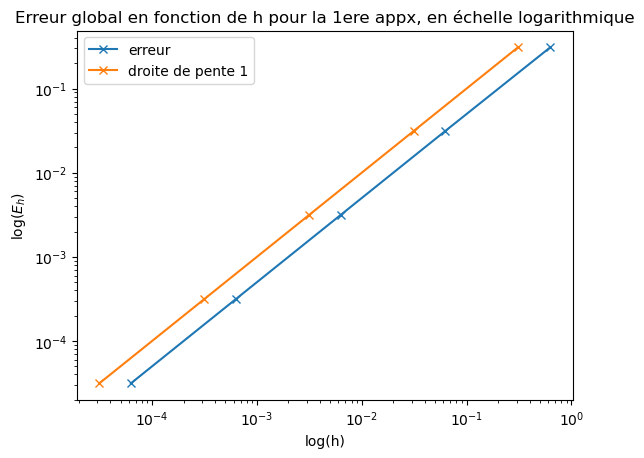

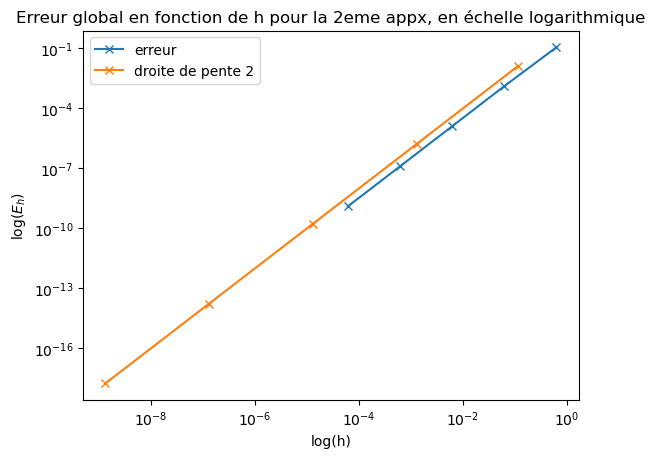

In [28]:
# listes ou on va garder les pas de temps et les erreurs globales correspondantes a chaque pas 
vec_h=[]
vec_err_1=[]
vec_err_2=[]
a=0
b=2*np.pi



for k in range(1,6):
    # Discrétisation de [0,1] de pas h
    N=10**k
    h=(b-a)/N
    x=np.linspace(a,b,N+1)


    # vecteur contenant U aux points de la discrétisation
    U1=u(x)


    # vecteur contenant U' avec l'approximation U'(x)=(U(x+h)-U(x))/h
    V1=np.empty(U1.shape)
    V1[:-1]=(U1[1:]-U1[:-1])/h
    V1[-1]=(U1[-1]-U1[-2])/h

    # vecteur contenant U' avec l'approximation U'(x)=(U(x+h)-U(x-h))/2h
    W1=np.empty(U1.shape)
    W1[1:-1]=(U1[2:]-U1[:-2])/(2*h)
    W1[-1]=(3*U1[-1]-4*U1[-2]+U1[-3])/(2*h)
    W1[0]=(-3*U1[0]+4*U1[1]-U1[2])/(2*h)
    
    E=max(abs(np.cos(x)-V1)) 
    vec_h.append(h)
    vec_err_1.append(E)
    print('erreur global, appx 1, pour h=',h,' est égale à ',E)
    print('\n')
    
    E=max(abs(np.cos(x)-W1)) 

    vec_err_2.append(E)
    print('erreur global, appx 2, pour h=',h,' est égale à ',E)
    print('\n')


plt.figure()
plt.plot(vec_h,vec_err_1,'x-',label='erreur')
plt.plot(vec_err_1,vec_err_1,'x-',label='droite de pente 1') #Ceci affiche une droite de pente 1.
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Erreur global en fonction de h pour la 1ere appx, en échelle logarithmique')
plt.xlabel('log(h)')
plt.ylabel('log($E_h$)')

plt.figure()
plt.plot(vec_h,vec_err_2,'x-',label='erreur')
plt.plot(vec_err_2,np.array(vec_err_2)**2,'x-',label='droite de pente 2')
 #Ceci affiche une droite de pente 1.
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Erreur global en fonction de h pour la 2eme appx, en échelle logarithmique')
plt.xlabel('log(h)')
plt.ylabel('log($E_h$)')


## Approximation des EDO.

On s'intéresse à des méthodes numériques pour approcher les équations différentielles ordinaires.\\

On considère le problème de Cauchy pour une équation diff\'erentielle ordinaire, ou pour un syst\`eme d'équations diff\'erentielles ordinaires, de la forme
\begin{equation}
\label{sys}
\tag{sys}
\left\{\begin{aligned}
  y'(t) & =  f(t,y(t)), \\
  y(t_0) & =  y_0,
\end{aligned} \right.
\end{equation}
o\`u $f$ : $I \times \R^n \longrightarrow \R^n$ est une
fonction continue et localement Lipschitzienne par rapport à sa deuxième variable, avec $I\subseteq\R$ un intervalle ouvert de $\R$ et où $(t_0,y_0)\in I\times\R^n$ est donné. Le problème de Cauchy \eqref{sys} admet alors une unique solution maximale définie dans un intervalle ouvert $J\subseteq I$ : ce résultat est une conséquence du **théorème de Cauchy-Lipschitz**.

On souhaite calculer une solution approchée (**discrète**) de ce problème dans un intervalle de la forme $[t_0,t_f]=[t_0,t_0+T]\subseteq J$, avec $T>0$.

Pour cela on procède comme suit.

1. On discrétise (c'est-à-dire on remplace du continu par du discret) l'intervalle $[t_0,t_0+T]$. Pour ce faire on se donne $N\in\N$ et on définit une sub-division de $[t_0,t_0+T]$ en $N$ sous-intervalles définis par les $N+1$ points, appelées points de la discrétisation,
$$
t_0<t_1<\dots<t_N=t_0+T.
$$
On appelle aussi les points $t_n$ les **instants temporels**, car pour de nombreuses EDO modélisant des phénomènes physiques, la variable $t$ représente le temps}.
Le point $t_0$ est appelé l'**instant initial** et le point $t_N$ l'**instant final**. On appelle aussi :
 - $h_n:=t_{n+1}-t_n$ le **pas de temps** ou **le pas de discrétisation** **entre $t_n$ et $t_{n+1}$**, pour $n=0,\dots,N-1$ ;
 - $h:=\displaystyle{\max_{n=0,\dots,N-1} h_n}$ le **pas de temps** ou **pas de la discrétisation**.
 
 La discrétisation est dite **uniforme** si $h_n=h,\ $ pour tout $n=0,\dots,N-1.$ Dans ce cas la pas $h$ de la discrétisation est défini par
$$
h=\frac TN
$$
et les $N+1$ points de discrétisation sont définis par 
$$
t_n=t_0+nh,\ \ \ n=0,\dots,N.
$$
2. On construit $N+1$ valeurs $y^0,\dots,y^N$ qui approchent la solution exacte $y$ de \eqref{sys}, aux points $t_0,\dots,t_N$, autrement dit on construit des valeurs $y^0,\dots,y^N$ tels que
  $$
  y^n\approx y(t_n),\ \textrm{pour }  n=0,\dots,N.
  $$
  
  
Une **méthode numérique** ou un **schéma numérique** est donc la donnée d'une telle construction. Plus précisément, c'est la donnée d'une suite $(y^0,\dots,y^N)_{N\in\N}$, indexée par $N\in\N$, de valeurs approchant les valeurs exactes $(y(t_0),\dots,y(t_N))$ de la solution $y$ de \eqref{sys} aux points de la discrétisation $(t_0,\dots,t_N)$. On appelle souvent la suite $(y^0,\dots,y^N)_{N\in\N}$ de **solution approchée** ou **solution numérique** et, pour $N\in\N$ donnée, le terme d'ordre $N$ de cette suite solution approchée (ou solution numérique) associée à une discrétisation de l'intervalle $[t_0,t_0+T]$ de $N+1$ points ou de pas $h=\displaystyle{\max_{0,\dots,N}}h_n$.

Comme la valeur de la solution exacte à l'instant initial $y(t_0)=y_0$ est connue, on prendra $y^0=y_0$.

La dépendance de la suite $(y^0,\dots,y^N)$ par rapport à $N$ n'est pas toujours spécifiée mais il faut la garder à l'esprit, ainsi que la dépendance de la suite $(t_0,\dots,t_N)$ définissant les points de la discrétisation de l'intervalle $[t_0,t_0+T]$.

**Lorsque $N$ augment, le nombre de points de la discrétisation augmente et on s'attend à ce que les valeurs approchées $y^0,\dots,y^N$  approchent de manière de plus en plus précise les valeurs exactes $y(t_0),\dots,y(t_N)$.**

Nous allons nous restreindre à des discrétisations uniformes de l'intervalle $[t_0,t_0+T]$ ({\it le cas d'une discrétisation à pas $h_n$ variable est souvent utilisé lorsque l'on veut adapter le pas de la discrétisation pour améliorer la précision du schéma}). Dans ce cas, comme $h=\frac TN$, on peut de manière équivalente voir la suite approchée $(y^0,\dots,y^N)$ comme une suite indexée par $N\in\N$ ou comme une suite indexée par $h\in]0,1]$ ; on a choisi l'intervalle $]0,1]$ pour $h$ mais on aurait pu choisir n'importe quel autre intervalle de la forme $]0,h_{max}]$. Ce qui nous intéressera sera le comportement de la solution approchée $(y^0,\dots,y^N)$ lorsque $N$ tend vers l'infini ({\it i.e., lorsque le nombre de points de la discrétisation tend vers l'infini, ce qui correspond à ce que l'ensemble discret qui représente l'intervalle $[t_0,t_0+T]$ tend vers cet intervalle}), ou de manière équivalente, lorsque $h$ tend vers 0 (**i.e. lorsque la distance entre deux points consécutifs de la discrétisation tend vers 0**).

Dans cette feuille on va considérer les sch\'emas num\'eriques suivants afin de calculer une approximation $y^n$ de $y(t_n)$ pour $n=0,\dots,N$. 

On pose $y^0=y_0,\,$ et, pour $n=0,\dots,N-1,$ 

- **Euler explicite** :   $y^{n+1}=y^{n}+h f(t_n,y^{n})$|
-  **Heun** :  $y^{n+1}=y^{n}+\frac{h}{2}\big(f(t_n,y^{n})+f\big(t_n+h,y^{n}+h f(t_n,y^{n})\big)\big)$ 
- **Runge Kutta 4** :  $y^{n+1}=y^{n}+\frac{h}{6}(p_1+2p_2+2p_3+p_4)$  où

 $p_1=f(t_n,y^{n})$,
 
 $p_2=f(t_n+\frac{h}{2},y^{n}+\frac{h}{2} p_1)$,
 
 $p_3=f(t_n+\frac{h}{2},y^{n}+\frac{h}{2} p_2)$,
 
 $p_4=f(t_n+h,y^{n}+h p_3)$ 

Ces trois méthodes sont des méthodes explicites (la valeur $y^{n+1}$ se calcule explicitement à partir de valeurs antérieures), à un pas (la valeur $y^{n+1}$ se calcule uniquement à partir de la valeur précédente $y^n$). Ces méthodes peuvent s'écrire sous une forme générique
$$
(S)\ \ \ \ y^{n+1}=y^n+h\Phi(t_n,y^n,h),
$$
pour $n=0,\dots,N-1$, avec $y^0$ donné (nous considérerons toujours $y^0=y_0$),
où $\Phi:[t_0,t_0+T]\times \R^n\times[0,1]\longrightarrow\R^n$ est une fonction continue. Par exemple, dans le cas de la méthode d'Euler, $\Phi(t,y,h)=f(t,y).$


### Questions théoriques - convergence d'une méthode numérique.

La convergence d'une méthode numérique pour une EDO est liée à deux notions : la **consistance** et la **stabilité**. Nous allons retrouver ces notions dans le cadre des méthodes de différences finies pour les EDP.

Considérons une méthode numérique définie par $(S)$. Soit $y$ la solution exacte du problème de Cauchy \eqref{sys}. 
On appelle **erreur locale à l'instant $t_n$** de la méthode, la quantité
$$
e^n=y(t_n)-y^n.
$$
La méthode définie par $(S)$ est dite **convergente** sur l'intervalle $[t_0,t_0+T]$ si pour toute donnée initiale $y_0$, 
$$
\lim_{h\to0}\Big(\max_{n=0,\dots,N}\|e^n\|\Big)=0,
$$
autrement dit si pour toute donnée initiale $y_0$,
$$
\lim_{h\to0}\Big(\max_{n=0,\dots,N}\|y(t_n)-y^n\|\Big)=0.
$$

On remarque que la solution exacte $y$ de \eqref{sys} vérifie
\begin{equation*}
y(t_{n+1})%&=y(t_n)+h\Phi(t_n,y(t_n),h)+y(t_{n+1})-y(t_n)-h\Phi(t_n,y(t_n),h)\\
           %&
            =y(t_n)+h\Phi(t_n,y(t_n),h)+\varepsilon^n,\ \ \ n=0,\dots,N-1,%\\ y(t_0)&=y_0,
\end{equation*}
où la quantité
$$
\varepsilon^n=y(t_{n+1})-y(t_n)-h\Phi(t_n,y(t_n),h)
$$
s'appelle **erreur de consistance** de la méthode $(S)$ à l'étape $n$, relative à la solution $y$. C'est l'erreur commise par une itération du schéma sur la solution exacte. La méthode est dite **consistante** si la somme des erreurs de consistance est petite :
$$
\lim_{h\to0}\sum_{n=0}^{N-1}\|\varepsilon^n\|=0 ;
$$
la méthode est dite **consistante d'ordre au moins $p$** s'il existe une constante $C>0$, indépendante de $h$, tel que 
$$
\forall\ N\in\N,\ \ \sum_{n=0}^{N-1}\|\varepsilon^n\|\leq Ch^p.
$$

**La méthode est consistante si l'erreur commise par une étape du schéma est petite car la discrétisation est cohérente avec l'EDO**.

La méthode est dite **stable** s'il existe une constante $M>0$, indépendante de $h$, tel que pour toutes suites $y^n$ et $\widetilde{y}^n$ définies par
\begin{align*}
  y^{n+1}&=y^n+h\Phi(t_n,y^n,h),\ \ n=0,\dots,N-1,\ \ \ y^0\ \textrm{donn\'e},\\
  \widetilde{y}^{n+1}&=\widetilde{y}^n+h\Phi(t_n,\widetilde{y}^n,h)+\rho^n,\ \ n=0,\dots,N-1,\ \ \ \widetilde{y}^0\ \textrm{donn\'e},
\end{align*}
avec $\rho^n\in\R,\ n=0,\dots,N-1$, on ait
$$
\max_{n=0,\dots,N}\|y^n-\widetilde{y}^n\|\leq M\Big(\|y^0-\widetilde{y}^0\|+\sum_{n=0}^{N-1}\|\rho^n\|\Big).
$$

**Une méthode stable est alors une méthode telle que, lorsque l'on introduit une perturbation $\rho^n$ à chaque étape du schéma, l'erreur totale de la méthode est contrôlée par le cumul des perturbations**.

**Exercice 5.**
  Montrer que si la méthode est stable et consistante, alors elle est convergente. Montrer que si la méthode est stable et consistante d'ordre au moins $p$ alors
  il existe une constante $\tilde{C}$ indépendante de $h$ tel que
$$
\max_{n=0,\dots,N}\|y(t_n)-y^n\|\leq \tilde{C}h^p.
$$


**On utilise souvent la formulation  "méthode d'ordre $p$"  au lieu de "méthode consistante d'ordre $p$" pour une méthode dont l'erreur de consistance est d'ordre $p$. Ce dernier exercice montre que si la méthode  est consistante d'ordre $p$, l'erreur globale du schéma se comporte aussi comme $\mathcal{O}(h^p)$.**

**Exercice 6**
Supposons la solution $y$ du problème de Cauchy \eqref{sys} régulière. On peut montrer, en utilisant des développements de Taylor appropriés, que la méthode d'Euler explicite est consistante d'ordre 1 et que la méthode de Heun est consistante d'ordre 2 (celle de RK4 est consistante d'ordre 4 mais les calculs sont plus compliqués).



**Exercice 7.  Méthodes d'Euler, Heun et RK4.**
1. Pour chacune des trois méthodes numériques données, écrire une fonction python de la forme
   `meth(fct, t0, tf, y0, h)`

  avec `meth = euler_exp, Heun` ou `RK4`,
 prenant en argument  `fct` la fonction $f(t,y)$, les extrémités `t0` et `tf` de l'intervalle de temps  $[t_0,t_f]=[t_0,t_0+T],$ la donnée initiale `y0` et le pas de temps `h`. Cette fonction devra retourner deux 
 tableaux :  
 - $[t_0,\, t_1,\, ...,\, t_N],$ tableau numpy unidimensionnel de taille $(N+1)\times 1$ représentant la subdivision de l'intervalle $[t_0,t_f]$ de pas $h$ considérée, 
 - $[y^0,\, y^1,\, ...,\, y^N],$ tableau numpy de taille $(N+1)\times n$ représentant la solution approchée aux instants $t_n,\ n=0,\dots,N$, donnée par la méthode choisie.
2. Testez vos trois fonctions sur le modèle logistique
$$
(P_1)\ \ \ \ 
\begin{cases}
y'(t)=c y (1 - \frac{y}{b}),\\
y(0)=a,
\end{cases}
$$
dont la solution exacte est
$$
y(t) = \frac{b}{1 + \frac{b-a}{a} e^{-ct}},
$$
avec les données $c=1$, $b=2$, $a=0.1$, dans l'intervalle $[0,15]$, avec un pas $h=0.2$. Tracer sur la même fenêtre la solution exacte et les solutions approchées, obtenue avec le pas $h$ et dans une autre fenêtre avec un pas égal à $\frac h2$.

3. Testez ensuite vos fonctions dans le cas vectoriel $n>1$ ($n=2$) sur le problème
$$
(P_2)\ \ \ \
\begin{cases}
y''(t)  =    -y(t) + \cos(t)  \\
y(0)  =   5,\ \ y'(0)  =   1,  
\end{cases}
$$
dont la solution exacte est 
$$
y(t) = \frac{1}{2} \sin(t) t  + 5 \cos(t) + \sin(t),
$$
dans l'intervalle $[0,15]$, avec un pas  $h=0.2$.\\
Pour ce faire, il faut écrire l'équation d'ordre 2 de $(P_2)$ sous la forme d'un système de deux équations d'ordre 1 dans les nouvelles variables $u(t)=y(t)$ et $v(t)=y'(t)$. On se ramènera alors à la résolution d'une équation de la forme
$$
X'=F(t,X),\ \ \ \textrm{avec}\ X=(u,v)=(y,y')^T.
$$
 Représenter à nouveau la solution exacte et les solutions approchées dans une même fenêtre graphique.
 **La solution $y$ de $(P_2)$ correspond à la première composante du vecteur $X$ ci-dessus. Votre fonction `euler_exp` retournera dans ce cas, si vous avez respecté la structure conseillée, un tableau de taille $(N+1)\times2$, $N$ étant le nombre de points de la discrétisation. Ce tableau donne les valeurs approchées de $X$ au points de la discrétisation considérée, la première colonne correspondant à la première composante de $X$, la seconde à la seconde composante de $X$. La solution approchée de $(P_2)$ que l'on cherche correspond alors à la première colonne de ce tableau.**


Text(0.5, 1.0, 'Heun pour equation logistique')

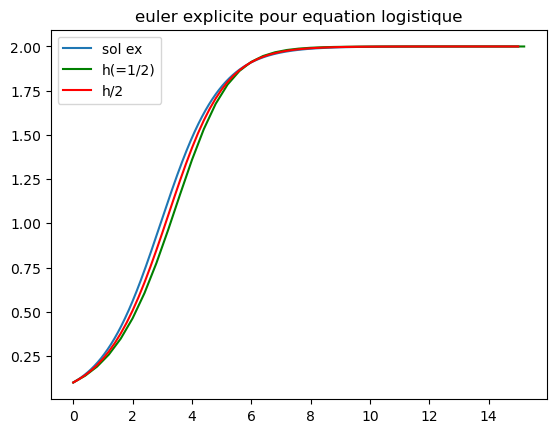

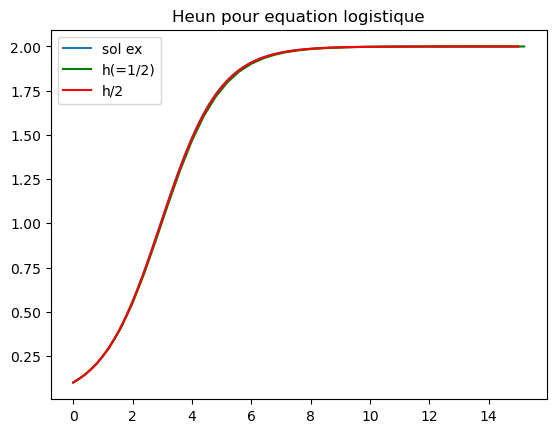

In [29]:
# Schémas numériques
# ------------------

# Il est plus simple de définir d'abord une version scalaire des schémas (c'est à dire un schéma pour approcher une 
# EDO scalaire) :

def euler_exp_s(f,t0,tf,y0,dt):
    T=np.arange(t0,tf+dt,dt)    
    N=T.size
    y=np.zeros(N)
    y[0]=y0
    for n in range(N-1):
        y[n+1]=y[n]+dt*f(y[n],T[n])
    return T,y

# méthode d'EE programmée vectoriellement, pour un système d'EDO. Elle peut être aussi utilisée dans le cas scalaire
# si on définit y0 comme un numpy array ( par exemple, si y0=1 il faut alors définir y0=np.array([1.]) ). 

def euler_exp(f,t0,tf,y0,h):
    T=np.arange(t0,tf+h,h)    
    N=T.size
    y=np.zeros((N,y0.size))  
    y[0,:]=y0
    for n in range(N-1):
        y[n+1,:]=y[n,:]+h*f(y[n,:],T[n])
    return T,y

# REMARQUE : Si on a un système de 2 équations, par exemple, de la forme | x'=f1(t,x,y),  
#                                                                        | y'=f2(t,x,y),
#            si on appelle X=(x,y), la solution approchée est (X_0,...,X_N)= ( (x_0,...,x_N) , (y_0,...,y_N) )
#            Dans la fonction euler_exp qu'on a construit, cette solution approchée est gardée dans le tableau y qui
#            a N lignes et 2 colonnes (comme dans odeint).
#            Donc dans la colonne 1 il y a (x_0,...,x_N), les valeurs approchées de la première composante de X, 
#            dans la colonne 2 il y a (y_0,...,y_NN), les valeurs approchées de la deuxième composante de X.

def Heun(f,t0,tf,y0,h):
    T=np.arange(t0,tf+h,h)
    N=T.size
    y=np.zeros((N,y0.size))
    y[0,:]=y0
    for n in range(N-1):
        p1=f(y[n,:],T[n])
        p2=f(y[n,:]+h*p1,T[n+1])
        y[n+1,:]=y[n,:]+h*(p1+p2)/2
    return T,y


def RK4(f,t0,tf,y0,dt):
    T=np.arange(t0,tf+dt,dt)
    N=T.size
    y=np.zeros((N,y0.size))
    y[0,:]=y0
    for n in range(N-1):
        p1=f(y[n,:],T[n])
        p2=f(y[n,:]+dt*p1/2,T[n]+dt/2)
        p3=f(y[n,:]+dt*p2/2,T[n]+dt/2)
        p4=f(y[n,:]+dt*p3,T[n]+dt)
        y[n+1,:]=y[n,:]+(p1+2*p2+2*p3+p4)/6
        y[n+1]=y[n]+dt*(p1+2*p2+2*p3+p4)/6
    return T,y


# Fonctions f second membre de l'EDO
# ----------------------------------


def fS1(y,t,b=2.,c=1.):
    return c*y*(1.-y/b)


# Solutions exactes des EDO
# -------------------------

def u1(t,a=0.1,b=2.,c=1.):
    return b/(1+(np.exp(-c*t))*(b-a)/a)

t0=0
tf=15

a=0.1

h=0.4
y0=np.array([a])


# Solutions approchées par EE et par Heun

T1E,y1E=euler_exp(fS1,t0,tf,y0,h)
T2E,y2E=euler_exp(fS1,t0,tf,y0,h/2)

T1H,y1H=Heun(fS1,t0,tf,y0,h)
T2H,y2H=Heun(fS1,t0,tf,y0,h/2)


# pour représenter la solution exacte
pas=10**(-4)
vect=np.arange(t0,tf+pas,pas)

plt.figure(1)
plt.plot(vect,u1(vect),label='sol ex')
plt.plot(T1E, y1E,'g',label='h(=1/2)')
plt.plot(T2E, y2E,'r',label='h/2')
plt.legend()
plt.title('euler explicite pour equation logistique')

plt.figure(2)
plt.plot(vect,u1(vect),label='sol ex')
plt.plot(T1H, y1H,'g',label='h(=1/2)')
plt.plot(T2H, y2H,'r',label='h/2')
plt.legend()
plt.title('Heun pour equation logistique')


**Exercice 8**
On se donne un problème de Cauchy de la forme **(sys)** et une méthode numérique pour approcher la solution de **(sys)** dans un intervalle de la forme $[t_0,t_0+T]$. Pour un certain pas de temps $h$ fixé (ou pour un certain nombre de points de la discrétisation $N$ fixé), l'erreur globale entre la solution approchée associée à une discrétisation de pas $h$ de l'intervalle $[t_0,t_0+T]$ et la solution exacte est donnée par :
\begin{equation*}
E_h =  \max_{k=0,\cdots,N}( |y(t_k)-y^{k}|). 
\end{equation*}
Ci dessus, $y(t_k)$ est la solution exacte à l'instant $t_k$ et $y^{k}$ la valeur approchée de $y(t^k),$ donnée par le schéma numérique.

**Remarque** : l'erreur globale $E$ dépend du pas $h$, ou, de manière équivalente, du nombre de points $N$ de la discrétisation.  Parfois dans la littérature on ne spécifie pas la dépendance de $E$ par rapport à $h$, mais on doit toujours garder à l'esprit cette dépendance et que l'erreur est donc une fonction de $h$.

Considérons le problème
$$
(P_3)\ \ \ \
\begin{cases}
y'(t)=\frac{\cos(t)-y(t)}{1+t},\\
y(0)=-\frac14, 
\end{cases}
$$
dont la solution exacte est 
$$
y(t) = \frac{\sin(t)-1/4}{1 + t}.
$$

1. Calculez les solutions approchées de $(P_3)$ obtenues avec le schéma d'Euler explicite, avec $h=1/2^s$ pour $s = 1,2,...,8$ ; 
  Calculer, pour chaque valeur de $h=1/2^s,\ s = 1,2,...,8,$ l'erreur globale $E_h$ correspondante. Représentez ensuite, en échelle logarithmique, l'erreur en fonction du pas de temps $h$, autrement dit, représentez $\log(E_h)$ en fonction de $\log(h)$. Vous devez obtenir des points qui sont à peu près alignés sur une droite de pente 1. Vérifiez graphiquement que c'est le cas, en estimant la pente de la droite passant au plus prêt des points (ou en représentant une droite de pente $1$ qui passe par un des points et en vérifiant que tous les points sont à peu près sur cette droite).
  Ceci signifie que $\log(E_h) \sim C+\log(h)$ et donc que $E_h\sim \widetilde{C}h$, pour certaines constantes $C$ et $\widetilde{C}$. On dit que la méthode d'Euler explicite est d'{\color{blue} ordre} 1 : c'est l'ordre de la puissance de $h$ dans cette relation. On a donc que l'erreur globale $E_h$ tend vers 0 comme $h$. L'ordre d'une méthode donne une indication sur sa vitesse de convergence. Une méthode d'ordre $p$ est une méthode dont l'erreur globale tend vers $0$ comme $h^p$. Donc plus l'ordre est élevé, plus la méthode converge plus vite.
  
 **Remarque** : pour étudier numériquement l'ordre d'une méthode, on utilise souvent l'échelle logarithmique pour tracer l'erreur en fonction du pas de discrétisation $h$. La pente de la droite obtenue donne l'ordre $p$ de la méthode : si $E_h \sim Ch^p$ alors $\log(E_h)\sim \log(C) + p\log(h)$.

erreur global pour h= 0.5  est égale à  0.24679202822617596


erreur global pour h= 0.25  est égale à  0.11040093896816727


erreur global pour h= 0.125  est égale à  0.05280190074448804


erreur global pour h= 0.0625  est égale à  0.02585727613212707


erreur global pour h= 0.03125  est égale à  0.012797869725736155


erreur global pour h= 0.015625  est égale à  0.006366858911482087


erreur global pour h= 0.0078125  est égale à  0.003175485838083414


erreur global pour h= 0.00390625  est égale à  0.0015857718084631434




Text(0, 0.5, 'log($E_h$)')

<Figure size 640x480 with 0 Axes>

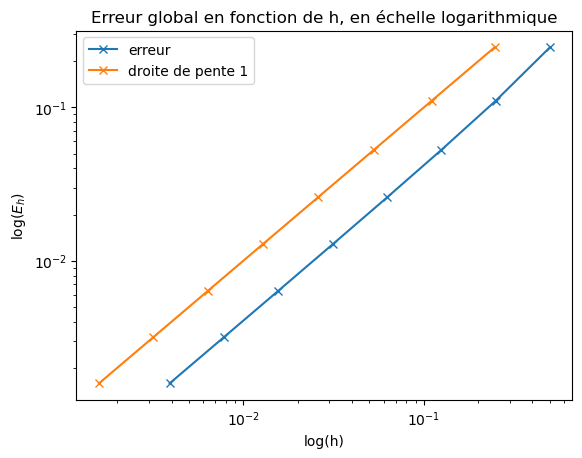

In [30]:
#Euler

# EDO (P3) y'=(cos(t)-y)/(1+t) (exo 3)
def f3(y,t):
    return (np.cos(t)-y)/(1+t)

# Solution exacte du problème (P3) y'=(cos(t)-y)/(1+t), y(0)=-1/4 (exo 3)
def u3(t):
    return (np.sin(t)-1./4)/(1+t)


t0=0
tf=20
y0=np.array([-1./4])
h=0.5

vect=np.linspace(t0,tf+pas,1000)

# listes ou on va garder les pas de temps et les erreurs globales correspondantes a chaque pas de temps
 
vec_h=[]
vec_err=[]

# figure où l'on  va afficher la différence en valeur absolue entre sol exacte et sol approchée
plt.figure(6)

for k in range(8):
    T,y=euler_exp(f3,t0,tf,y0,h)

    E=max(abs(y[:,0]-u3(T))) # !!!! ATTENTION !!!! E=max(abs(y-u2(T))) si on utilise la version scalaire d'Euler explicite
    vec_h.append(h)
    vec_err.append(E)
    print('erreur global pour h=',h,' est égale à ',E)
    print('\n')
    h=h/2

plt.figure()
plt.plot(vec_h,vec_err,'x-',label='erreur')
plt.plot(vec_err,vec_err,'x-',label='droite de pente 1') #Ceci affiche une droite de pente 1.
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Erreur global en fonction de h, en échelle logarithmique')
plt.xlabel('log(h)')
plt.ylabel('log($E_h$)')
    



2. Vous pouvez refaire l'exercice pour la méthode de Heun et de RK4. Vous allez conclure que la méthode de Heun est d'ordre 2 et la méthode de RK4 d'ordre 4.


Text(0, 0.5, 'log($E_h$)')

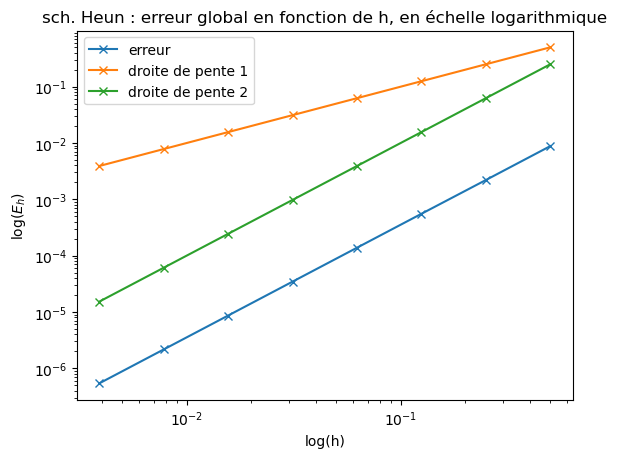

In [31]:
# Heun
t0=0
tf=20
y0=np.array([-1./4])
h=0.5

# listes ou on va garder les pas de temps et les erreurs globales correspondantes a chaque pas de temps
 
vec_h=[]
vec_err=[]

for k in range(8):
    T,y=Heun(f3,t0,tf,y0,h)
    E=max(abs(y[:,0]-u3(T))) 
    vec_h.append(h)
    vec_err.append(E)
    h=h/2

plt.figure()
plt.plot(vec_h,vec_err,'x-',label='erreur')
plt.plot(vec_h,vec_h,'x-',label='droite de pente 1') #Ceci affiche une droite de pente 1.
plt.plot(vec_h,np.array(vec_h)**2,'x-',label='droite de pente 2') #Ceci affiche une droite de pente 2.
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('sch. Heun : erreur global en fonction de h, en échelle logarithmique')
plt.xlabel('log(h)')
plt.ylabel('log($E_h$)')

# COMMENTAIRE :
#En échelle logarithmique, les points correspondant à l'erreur globale du schéma d'Heun en fonction de h semblent bien à 
#peu prés alignés sur une droite de pente 2 puisque l'on a représenté une droite de pente 2 à coté qui semble parallèle à 
#la ligne qui contient les points. Cela montre que le schéma d'Heun est d'ordre 2. Il est donc plus précis que le schéma d'Euler 
#(car l'erreur tend vers 0 comme h^2, alors que pour Euler l'erreur tend vers 0 comme h).



Text(0, 0.5, 'log($E_h$)')

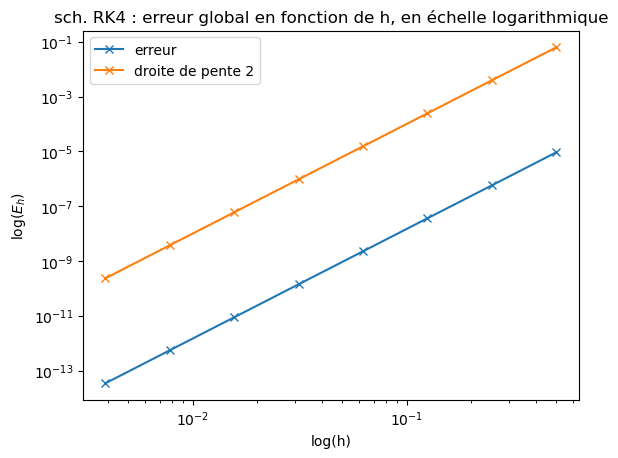

In [32]:
t0=0
tf=20
y0=np.array([-1./4])
h=0.5

# listes ou on va garder les pas de temps et les erreurs globales correspondantes a chaque pas de temps
 
vec_h=[]
vec_err=[]

for k in range(8):
    T,y=RK4(f3,t0,tf,y0,h)
    E=max(abs(y[:,0]-u3(T))) 
    vec_h.append(h)
    vec_err.append(E)
    h=h/2

plt.figure(10)
plt.plot(vec_h,vec_err,'x-',label='erreur')
plt.plot(vec_h,np.array(vec_h)**4,'x-',label='droite de pente 2') #Ceci affiche une droite de pente 4.
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('sch. RK4 : erreur global en fonction de h, en échelle logarithmique')
plt.xlabel('log(h)')
plt.ylabel('log($E_h$)')


